In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [9]:
WHITE = 0

In [2]:
path = "Folhas/Teste01.png"
im0 = cv2.imread(path)

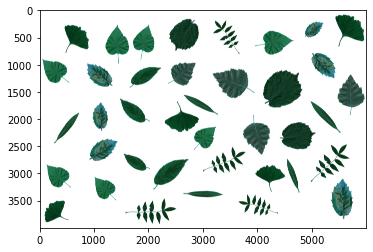

(4000, 6000, 3)


In [3]:
plt.imshow(im0)
plt.show()
print(np.shape(im0))

In [4]:
### Algoritmo Seguidor de Fronteira

height = np.shape(im0)[0]
width = np.shape(im0)[1]

b_0 = (0, 1)
c_0 = (0, 0)

b_1 = 0
c_1 = 0

b = 0
c = 0



In [5]:
neighbors = {
    "n_1": [-1, 0],
    "n_2": [-1,-1],
    "n_3": [ 0,-1],
    "n_4": [ 1,-1],
    "n_5": [ 1, 0],
    "n_6": [ 1, 1],
    "n_7": [ 0, 1],
    "n_8": [-1, 1]
}

In [98]:
##TODO função de percorrer dicionário
# func(b, n)
# retornar proximo_n

In [6]:
## func by Numnes
def rotClockwise(axis, nei):
    cont_n = 1
    while nei != axis + neighbors["n_"+str(cont_n)]:
        cont_n+=1
    return cont_n, axis + neighbors["n_"+str(cont_n)]

In [8]:
# another #byNumnes func
def frontierExplorator(b, c, matrix, b_0, frontier):
    if b == b_0:
        return frontier
   
    cont_n, nk =  rotClockwise(b, c)

    while matrix[nk[0], nk[1]] != WHITE:
        nk = b + neighbors["n_"+str(cont_n)]
        cont_n+=1
    c = b + neighbors["n_"+str(((cont_n-1)+9)%9)] # aqui não lembro como arruma
    b = nk
    frontier += [b]
    return frontierExplorator(b, c, matrix, b_0, frontier)

In [7]:
#func by Numnes
def frontierFinder(b_0, matrix):
    height = np.shape(matrix)[0]
    width  = np.shape(matrix)[1]

    while matrix[b_0[0], b_0[1]]==WHITE:
        if b_0[1]!= width-1:
            b_0+=[0,1]
        else:
            if b_0[0]==height-1:
                return
            b_0+=[1,-width+1]

    c = b_0 + neighbors["n_1"]

    # procura o primeiro vizinho não branco para ser o c
    cont_n = 1
    while matrix[c[0], c[1]] != WHITE:
        c = b_0 + neighbors["n_"+str(cont_n)]
        cont_n+=1

    b = c
    c = b_0 + neighbors["n_"+str(((cont_n-1)+9)%9)]# aqui não lembro como arruma
    frontier = [b_0, b] + frontierExplorator(b, c, matrix, b_0, frontier)

    res = np.zeros((height, width))
    for f in frontier:
        res[f[0], f[1]] = 1
    plt.imshow(res)
    plt.show()

In [ ]:
teste = np.array([[0,0,0,0,0,0,0],
              [0,0,1,1,1,1,0],
              [0,1,0,0,1,0,0],
              [0,0,1,0,1,0,0],
              [0,1,0,0,1,0,0],
              [0,1,1,1,1,0,0],
              [0,0,0,0,0,0,0]])

In [88]:
height = np.shape(teste)[0]
width = np.shape(teste)[1]

b_0 = np.array([0, 1])
c_0 = np.array([0, 0])

b_1 = 0
c_1 = 0

b = 0
c = 0

In [ ]:
frontierFinder(b_0, teste)

In [93]:
#while percorre pixels brancos até achar o primeiro não branco
while teste[b_0[0], b_0[1]]==0:
    if b_0[1]!= width-1:
        b_0+=[0,1]
    else:
        b_0+=[1,-width+1]
print(b_0)

[1 2]


In [94]:
c_0 = b_0 - [0,1]
print(c_0)

[1 1]


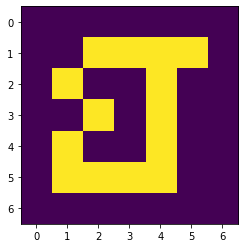

(7, 7)


In [73]:
plt.imshow(teste)
plt.show()
print(np.shape(teste))